[0.02097683 0.73097091 1.54887507 2.36677923 3.1846834  4.00258756
 4.82049172 5.63839588 6.45630005 7.27420421]


Text(0, 0.5, 'P0')

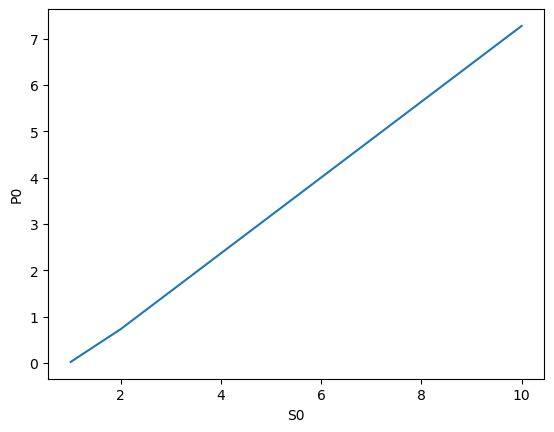

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

def european_call(r, u, d, S0, K, T, n, h):
    dt = T/n
    q = (math.exp(r*dt)-d)/(u -d)
    p0 = 0

    for i in range(n+1):
        s = S0*(u**(n-i))*(d**i)
        p0 = p0 + math.comb(n,i)*(q**i)*((1-q)**(n-i))*h(s, K)

    p0 = p0*math.exp(-r*T)
    return p0
def h(s,K):
    return np.max(np.array([s - K,0]))

r = 0.05
u = 1.05
d = 0.95
K = 1
T = 2
n = 10
N = 10
S0 = np.arange(0,N)+1
P0 = np.zeros((N,))
i=0
for s0 in S0:
    P0[i] = european_call(r, u, d, s0,K, T, n, h)
    i = i + 1
print(P0)

plt.figure()
plt.plot(S0,P0)
plt.xlabel("S0")
plt.ylabel("P0")

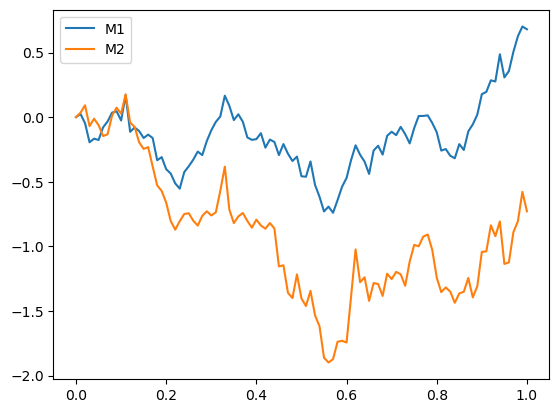

In [33]:
#Problem 2
def coupled_gain_process(xi, G, n, T):
    dt = T/n

    Bt = np.random.randn(2,n)*math.sqrt(dt)

    sol = np.zeros((2,n+1))
    for i in range(n):
        sol[:,i+1] = (sol[:,i].reshape(-1,1) + np.multiply(xi,np.matmul(G,Bt[:,i]).reshape(-1,1))).reshape(-1)

    return sol
n = 100
T = 1
t = np.linspace(0,1,num=n+1)
rho = 0.5
xi = np.array([[1],[2]])
G = np.array([[1,0],[rho,1-rho]])

sol = coupled_gain_process(xi, G, n, T)

plt.figure()
plt.plot(t,sol[0,:])
plt.plot(t, sol[1,:])
plt.legend(["M1","M2"])
